In [12]:
import pandas as pd
import seaborn as sns

In [15]:
data=pd.read_csv('Advertising.csv')

In [16]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
data.drop('Unnamed: 0',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


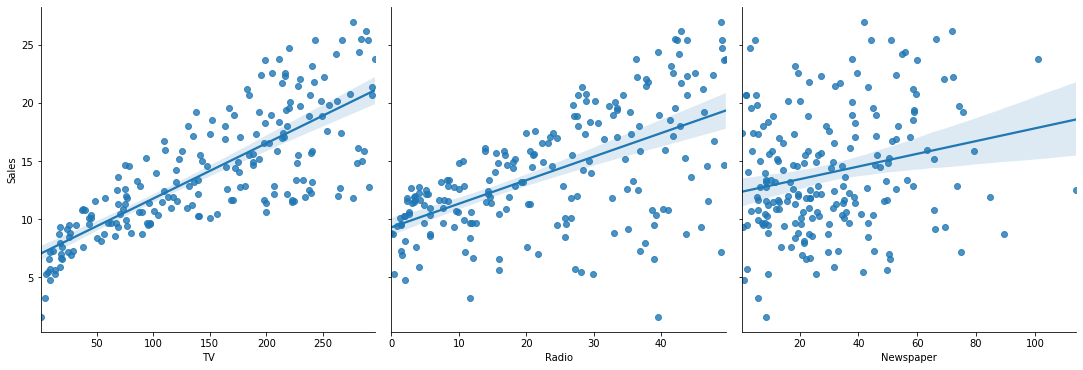

In [18]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars="Sales",  size=5,kind='reg')

In [19]:
X=data.drop('Sales',axis=1)

In [20]:
y=data.Sales

In [21]:
print(X.shape,y.shape)

(200, 3) (200,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [24]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [26]:
list(zip(X.columns,linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In [27]:
0.0034*1000

3.4

In [28]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [32]:
from sklearn import metrics
import numpy as np
print('The mean absolute error is',metrics.mean_squared_error(y_test, y_pred))
print('The RMSE is',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The mean absolute error is 1.9730456202283373
The RMSE is 1.404651423032895
